### АБ тестирование. Анализ гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Saurfang\OneDrive\Рабочий стол\A_B test\ДЗ1\new_dataframe.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101500 non-null  int64  
 1   user_id            101500 non-null  int64  
 2   hour               101500 non-null  int64  
 3   os                 101500 non-null  object 
 4   order_class        101500 non-null  object 
 5   surge              91431 non-null   object 
 6   app_opened         101500 non-null  int64  
 7   price_seen         101500 non-null  int64  
 8   order_made         101500 non-null  int64  
 9   ride_completed     101500 non-null  int64  
 10  user_cancelled     101500 non-null  int64  
 11  city_center_order  101500 non-null  int64  
 12  distance           91431 non-null   float64
 13  age                101500 non-null  int64  
 14  rfm                101500 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1

In [14]:
df.head(25)

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low
5,5,139455,5,Android,comfort,NaN,1,0,0,0,0,1,NaN,24,high
6,6,416988,0,iOS,comfort,no surge,1,1,0,0,0,1,7.535725,24,high
7,7,682337,2,Android,comfort,no surge,1,1,1,1,0,1,9.055344,21,low
8,8,931492,20,iOS,economy,NaN,1,0,0,0,0,0,NaN,25,low
9,9,662775,17,Android,comfort,surge,1,1,1,1,0,1,4.828326,36,low


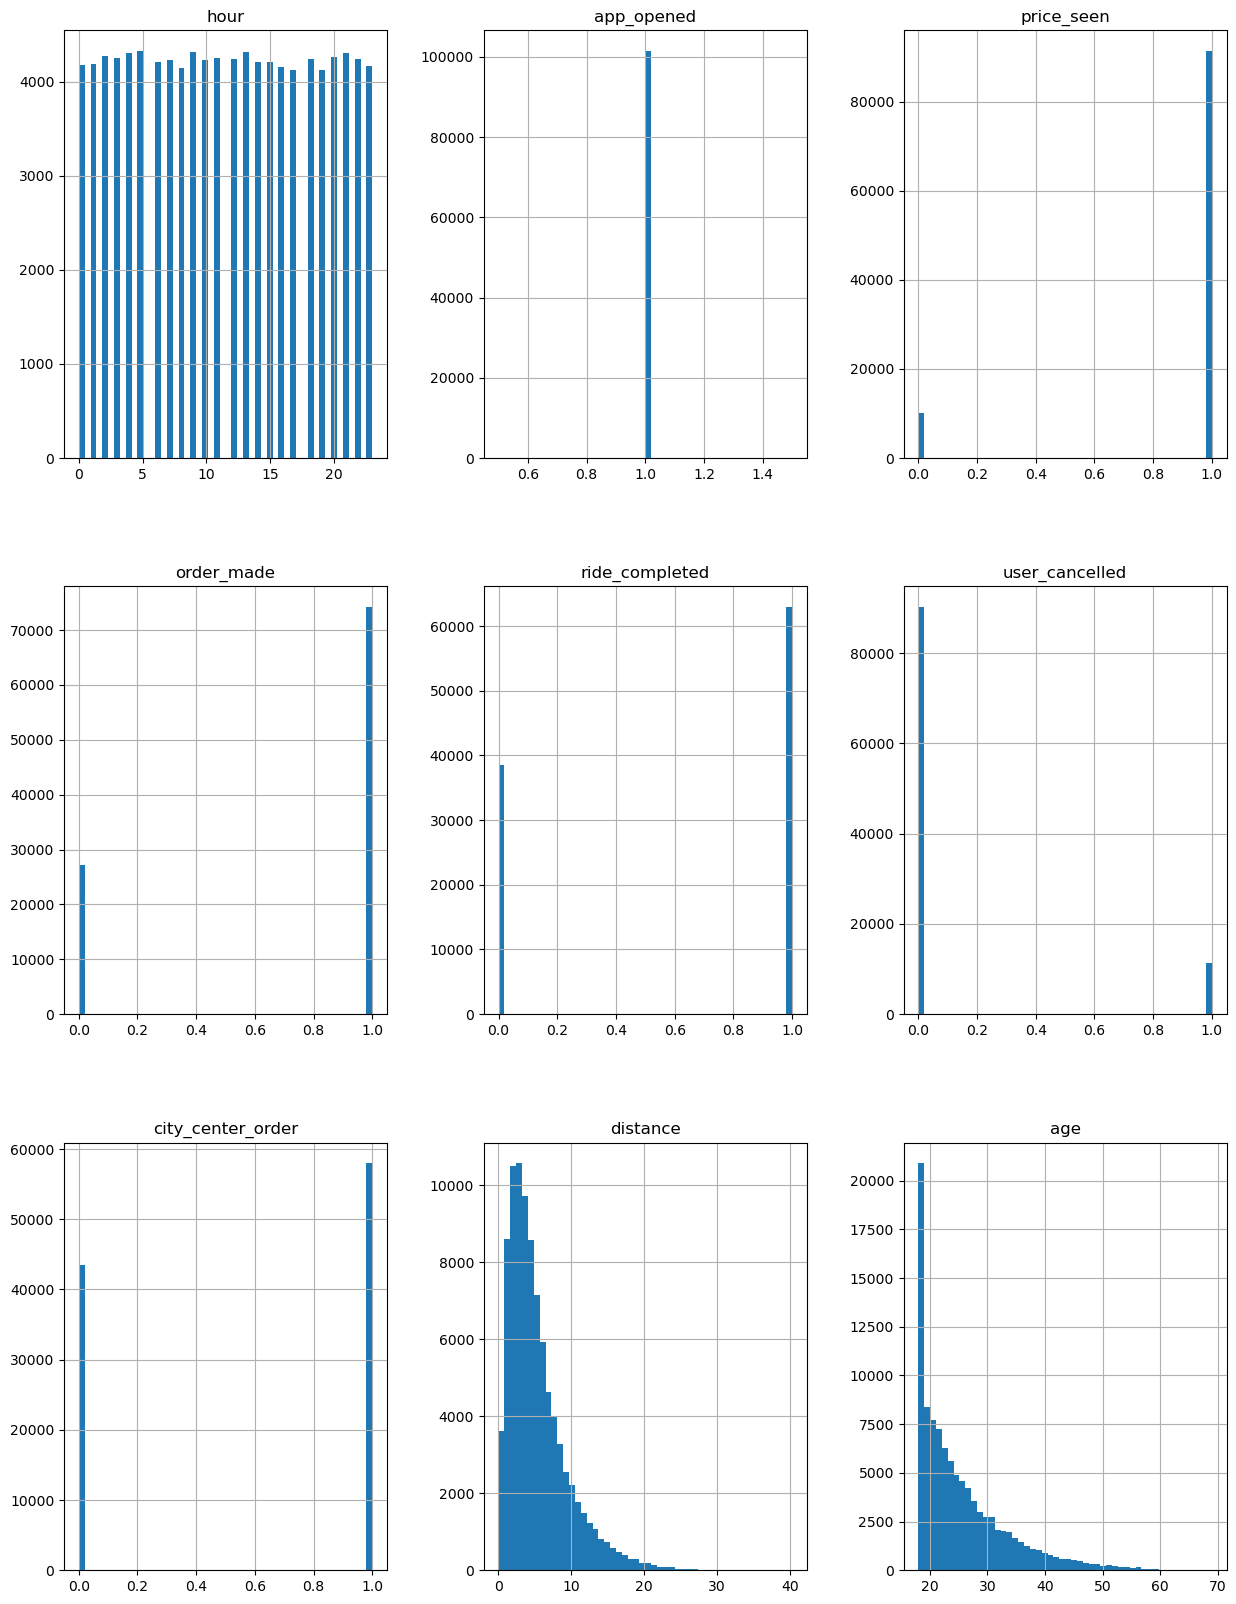

In [5]:
df[['hour', 'app_opened', 'price_seen', 'order_made', 'ride_completed', 'user_cancelled', 
      'city_center_order', 'distance', 'age', 'rfm']].hist(bins=50, figsize=(15, 20));

<AxesSubplot:>

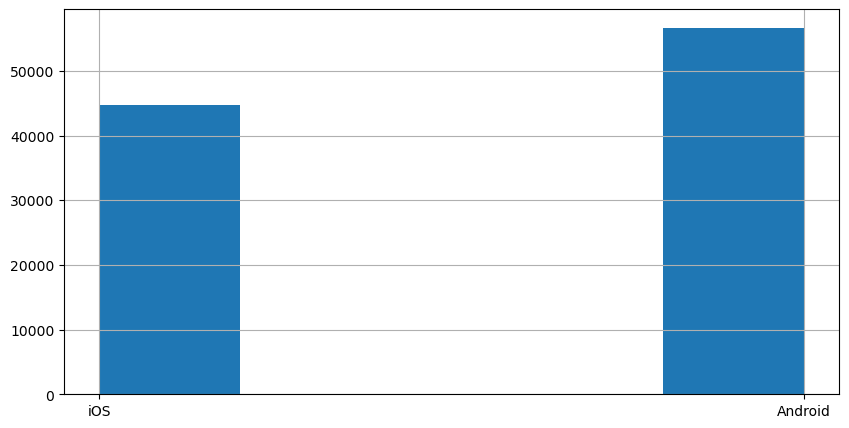

In [6]:
df['os'].hist(bins=5, figsize=(10, 5))

<AxesSubplot:>

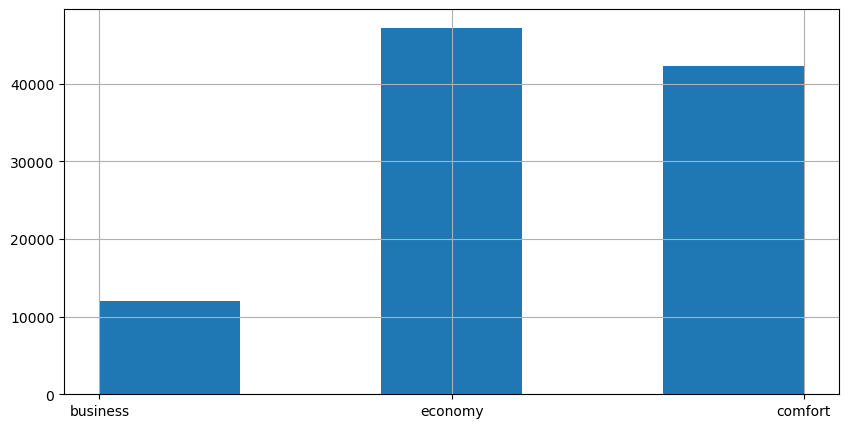

In [7]:
df['order_class'].hist(bins=5, figsize=(10, 5))

<AxesSubplot:>

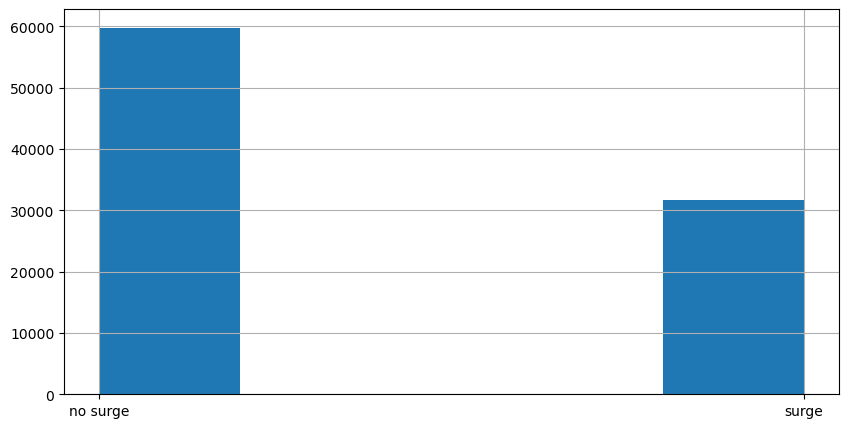

In [8]:
df['surge'].hist(bins=5, figsize=(10, 5))

In [9]:
df['age'].describe()

count    101500.000000
mean         25.906384
std           7.838328
min          18.000000
25%          20.000000
50%          24.000000
75%          29.000000
max          69.000000
Name: age, dtype: float64

In [10]:
df['distance'].describe()

count    91431.000000
mean         5.371152
std          4.118531
min          0.010946
25%          2.438335
50%          4.279565
75%          7.129814
max         40.268966
Name: distance, dtype: float64

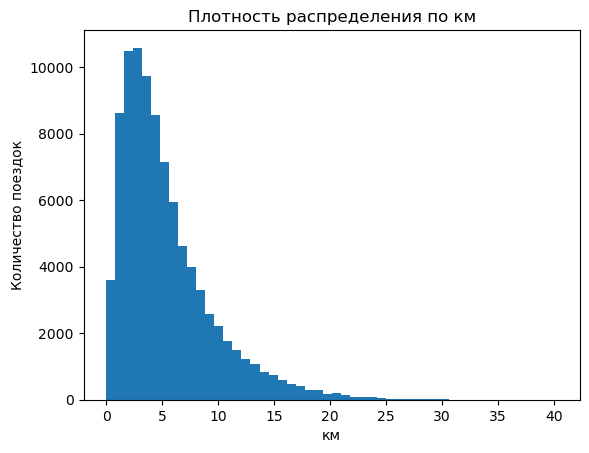

In [11]:
plt.hist(df['distance'], 50)
plt.title('Плотность распределения по км')
plt.xlabel('км')
plt.ylabel('Количество поездок')
plt.show()

In [13]:
df['order_made'].corr(df['price_seen'])

0.5475943147621141

In [18]:
df.loc[df["order_class"] == 'business', "distance"]

0          7.982135
4         10.704778
22         5.612632
40        12.089362
45        15.155294
            ...    
101486     4.368162
101491    16.003392
101492     7.993689
101493    14.090248
101498     8.825188
Name: distance, Length: 12033, dtype: float64

In [19]:
df.loc[df["order_class"] == 'business'].describe()

,Unnamed: 0,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age
count,12033.000000,12033.000000,12033.000000,12033.0,12033.000000,12033.000000,12033.000000,12033.000000,12033.000000,10795.000000,12033.000000
mean,51081.323942,548314.764730,11.566027,1.0,0.897116,0.724092,0.640073,0.084019,0.568187,12.013842,25.917145
std,29184.501492,256936.984515,6.895278,0.0,0.303820,0.446989,0.479999,0.277428,0.495349,4.902943,7.885960
min,0.000000,100134.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.398428,18.000000
25%,26121.000000,327249.000000,6.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,8.457992,20.000000
50%,51277.000000,547485.000000,12.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,11.361536,24.000000
75%,76170.000000,769111.000000,18.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,14.903526,30.000000
max,101498.000000,999978.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,40.268966,69.000000


In [20]:
df.loc[df["order_class"] == 'business', "distance"].describe()

count    10795.000000
mean        12.013842
std          4.902943
min          1.398428
25%          8.457992
50%         11.361536
75%         14.903526
max         40.268966
Name: distance, dtype: float64

In [21]:
df.loc[df["order_class"] == 'economy', "distance"].describe()

count    42631.000000
mean         3.997445
std          2.810381
min          0.010946
25%          1.920550
50%          3.367807
75%          5.390487
max         25.660365
Name: distance, dtype: float64

In [22]:
df.loc[df["order_class"] == 'comfort', "distance"].describe()

count    38005.000000
mean         5.025267
std          3.217209
min          0.057272
25%          2.675030
50%          4.355939
75%          6.627862
max         27.369403
Name: distance, dtype: float64

In [25]:
df.loc[df["price_seen"] == 1, "order_made"].describe()

count    91431.000000
mean         0.811935
std          0.390766
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: order_made, dtype: float64

In [26]:
df.loc[df["price_seen"] == 0, "order_made"].describe()

count    10069.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: order_made, dtype: float64